In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

In [2]:
forwards = load_forwards_df()
forwards.info()
forwards.head(20)

/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:39: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['TimeStamp'] = pd.to_datetime(forwards['TimeStamp'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-forward-curve/utils.py:41: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  forwards['Begin'] = pd.to_datetime(forwards['Begin'], errors='coerce')
/Users/adrianscholl/LRZ Sync+Share/Projects/price-fo

<class 'pandas.core.frame.DataFrame'>
Index: 41541 entries, 0 to 8916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Identifier  41541 non-null  object        
 1   TimeStamp   41541 non-null  datetime64[ns]
 2   Begin       41541 non-null  datetime64[ns]
 3   End         41541 non-null  datetime64[ns]
 4   Open        20589 non-null  float64       
 5   High        20589 non-null  float64       
 6   Low         20589 non-null  float64       
 7   Close       20569 non-null  float64       
 8   Settlement  41541 non-null  float64       
dtypes: datetime64[ns](3), float64(5), object(1)
memory usage: 3.2+ MB


,Identifier,TimeStamp,Begin,End,Open,High,Low,Close,Settlement
0,D,2021-01-04,2021-01-01,2021-01-02,NaN,NaN,NaN,NaN,48.40
1,D,2021-01-04,2021-01-02,2021-01-03,NaN,NaN,NaN,NaN,50.56
2,D,2021-01-04,2021-01-03,2021-01-04,NaN,NaN,NaN,NaN,38.62
3,D,2021-01-04,2021-01-04,2021-01-05,NaN,NaN,NaN,NaN,48.02
4,D,2021-01-04,2021-01-05,2021-01-06,54.50,54.50,53.5,54.00,55.34
5,D,2021-01-04,2021-01-06,2021-01-07,58.00,58.00,54.0,54.00,56.03
6,D,2021-01-04,2021-01-07,2021-01-08,69.25,69.25,68.0,68.00,69.25
7,D,2021-01-04,2021-01-08,2021-01-09,69.50,69.50,69.5,69.50,71.38
8,D,2021-01-04,2021-01-09,2021-01-10,NaN,NaN,NaN,NaN,55.31
9,D,2021-01-04,2021-01-10,2021-01-11,NaN,NaN,NaN,NaN,48.59


In [3]:
# Count all contracts (rows) in forwards grouped by the timestamp and identifier
contract_counts = forwards.groupby(['TimeStamp', 'Identifier']).size()
contract_counts = contract_counts.reset_index()
contract_counts

,TimeStamp,Identifier,0
0,2021-01-04,D,10
1,2021-01-04,M,10
2,2021-01-04,Q,8
3,2021-01-04,W,6
4,2021-01-04,WE,2
...,...,...,...
5604,2024-10-14,M,10
5605,2024-10-14,Q,10
5606,2024-10-14,W,6
5607,2024-10-14,WE,3


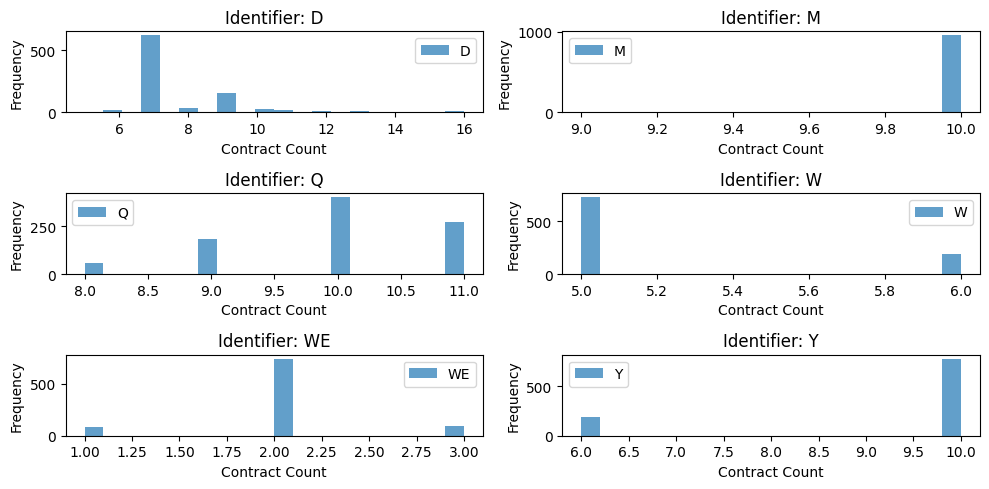

In [4]:
# Plot the distribution of the contract counts as histogram for each identifier in a grid plot with 2 columns
identifiers = contract_counts['Identifier'].unique()
num_identifiers = len(identifiers)

fig, axes = plt.subplots(nrows=(num_identifiers + 1) // 2, ncols=2, figsize=(10, 5))
axes = axes.flatten()

for i, identifier in enumerate(identifiers):
    ax = axes[i]
    data = contract_counts[contract_counts['Identifier'] == identifier]
    ax.hist(data[0], bins=20, alpha=0.7, label=identifier)
    ax.set_title(f'Identifier: {identifier}')
    ax.set_xlabel('Contract Count')
    ax.set_ylabel('Frequency')
    ax.legend()

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

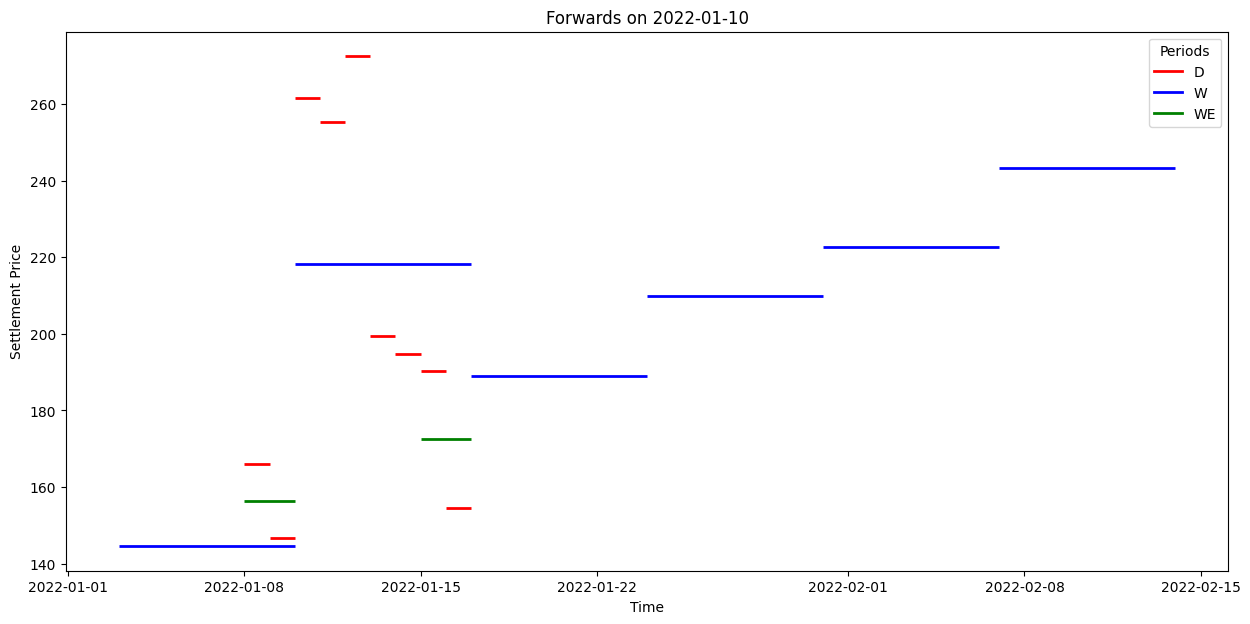

In [5]:
fig = plot_forwards(forwards, '2022-01-10', periods=['D','W','WE'])

In [6]:
# # make one big dataframe with arbitrage for every timestamp
# arbitrage_df = pd.DataFrame()
# for date in forwards['TimeStamp'].astype(str).unique():
#     arbitrage_df = pd.concat([arbitrage_df, get_arbitrage_opportunities_in_forwards(forwards, date)])
# arbitrage_df.sort_values(by=['profit'],ascending=False)

## Make PFC arbitrage free while maintaining the original shape as good as possible

In [7]:
def get_forwards(date, periods = ['D', 'W', 'WE', 'M', 'Q', 'Y']):
    data = forwards[((forwards['TimeStamp'].astype(str).str.contains(date))|(forwards['TimeStamp'].astype(str)==date))&(forwards.Identifier.isin(periods))]
    return data.sort_values(by=['Begin'])

In [8]:
test_forecast = pd.read_csv('data/prophet_pfc.csv',sep=',')
test_forecast['timestamp'] = pd.to_datetime(test_forecast['ds'], errors='coerce')
test_forecast['timestamp']

0       2016-01-01 00:00:00
1       2016-01-01 01:00:00
2       2016-01-01 02:00:00
3       2016-01-01 03:00:00
4       2016-01-01 04:00:00
                ...        
44208   2021-12-27 23:00:00
44209   2021-12-28 23:00:00
44210   2021-12-29 23:00:00
44211   2021-12-30 23:00:00
44212   2021-12-31 23:00:00
Name: timestamp, Length: 44213, dtype: datetime64[ns]

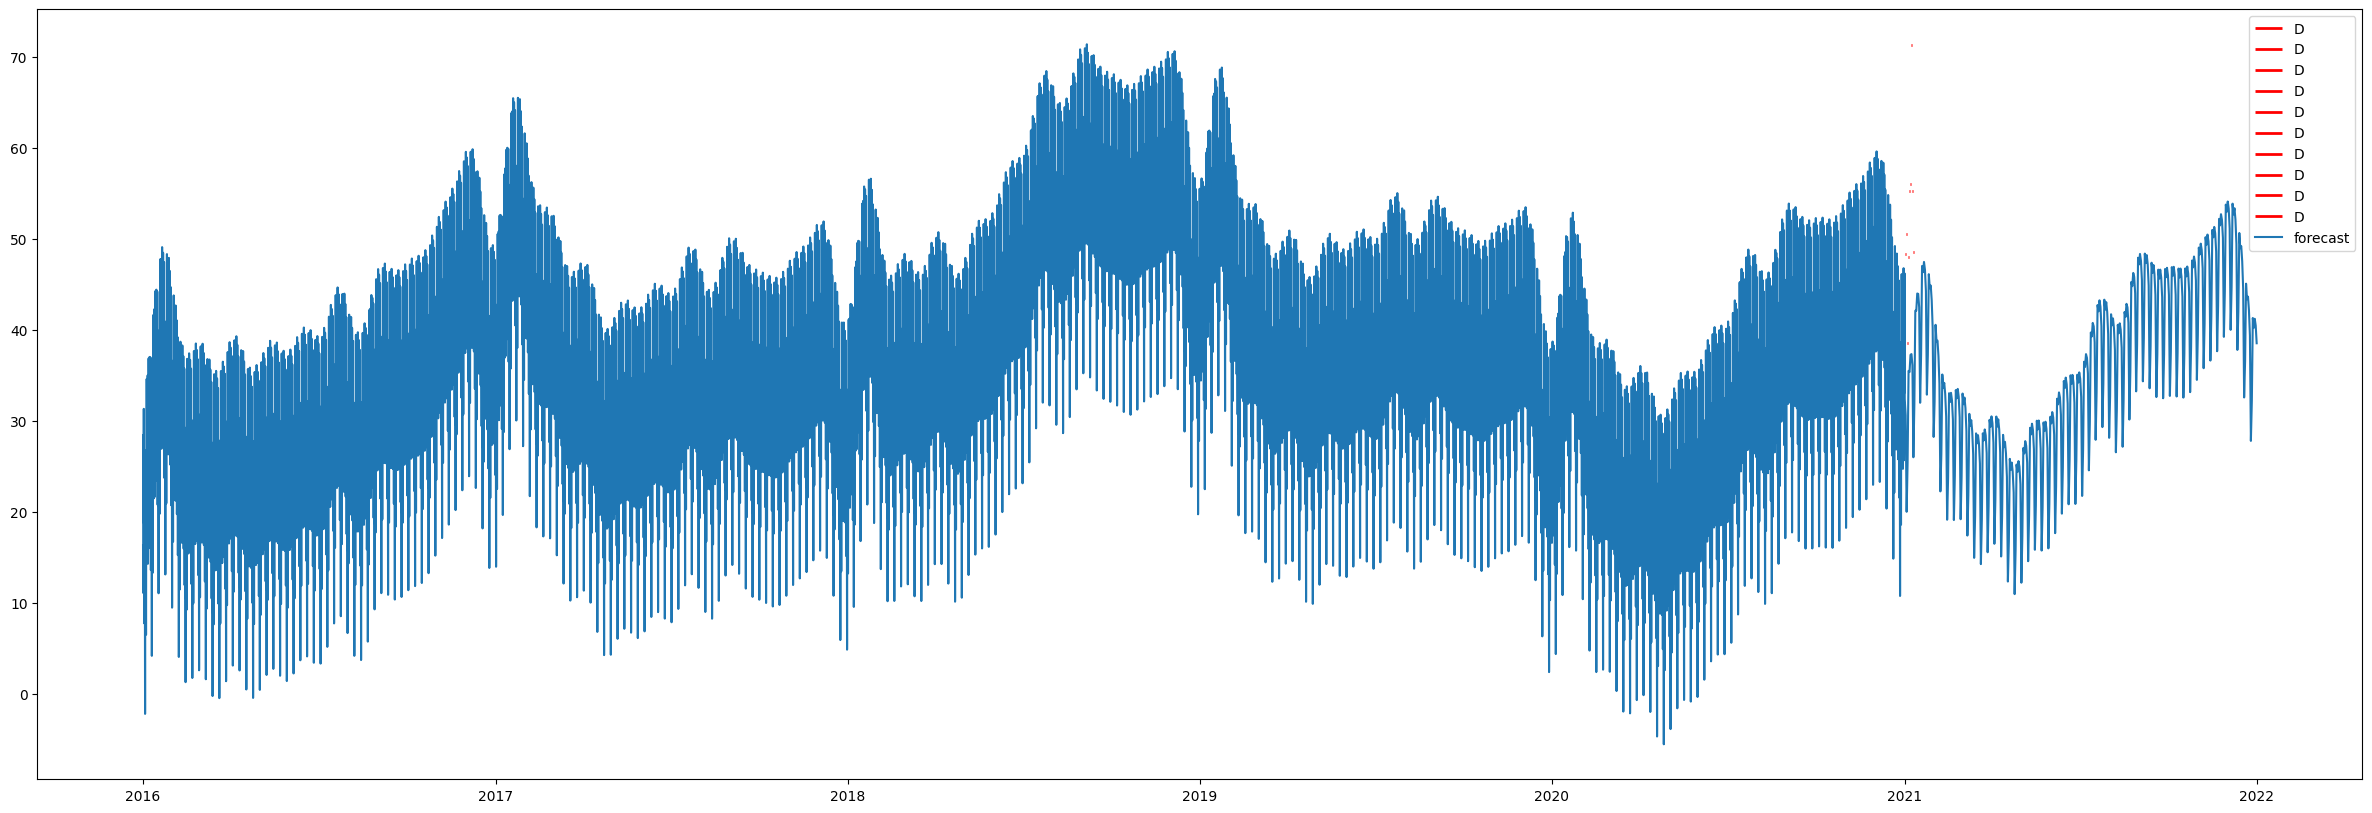

In [9]:
#plot the test forecast together with the forwards in the same period
timestamp = "2021-01-04"
data = get_forwards(timestamp, periods=['D'])
plt.figure(figsize=(30, 10))  # Change the figure size here
for index, row in data.iterrows():
    pass
    plt.hlines(y=row['Settlement'], xmin=row['Begin'], xmax=row['End'], color='red',lw=2,label=row['Identifier'])
plt.plot(test_forecast['timestamp'],test_forecast['yhat'],label='forecast')
plt.legend()
plt.show()

In [10]:
# create linear constraints that guarant arbitrage freeness for an hourly price curve
def get_restrictions(timestamp, start_date, end_date):
    # get daily contracts
    daily = get_forwards(timestamp,periods=['D'])
    first_daily, last_daily = daily['Begin'].min(), daily['End'].max()
    # s_daily = the price of the daily contracts that the 24 hourly prices from the pfc should be equal to
    s_daily = daily['Settlement'].values*24

    d = len(s_daily)
    C_daily = np.zeros((d,24*d))
    for i in range(d):
        C_daily[i,24*i:24*(i+1)] = 1
    #find the hourly index of the start and end date
    return C_daily,s_daily, first_daily, last_daily

In [11]:
fwds = forwards.sort_values(by=['Begin', "Identifier"])
fwds



,Identifier,TimeStamp,Begin,End,Open,High,Low,Close,Settlement
0,W,2021-01-04,2020-12-28,2021-01-04,NaN,NaN,NaN,NaN,45.25
0,D,2021-01-04,2021-01-01,2021-01-02,NaN,NaN,NaN,NaN,48.40
0,M,2021-01-04,2021-01-01,2021-02-01,NaN,NaN,NaN,NaN,52.98
10,M,2021-01-05,2021-01-01,2021-02-01,NaN,NaN,NaN,NaN,49.35
20,M,2021-01-06,2021-01-01,2021-02-01,NaN,NaN,NaN,NaN,49.93
...,...,...,...,...,...,...,...,...,...
8876,Y,2024-10-02,2034-01-01,2035-01-01,NaN,NaN,NaN,NaN,67.02
8886,Y,2024-10-03,2034-01-01,2035-01-01,NaN,NaN,NaN,NaN,67.20
8896,Y,2024-10-10,2034-01-01,2035-01-01,NaN,NaN,NaN,NaN,66.76
8906,Y,2024-10-11,2034-01-01,2035-01-01,NaN,NaN,NaN,NaN,66.77


In [12]:
print(fwds.Begin)
print(fwds.End)
print(test_forecast.timestamp.min())
print(test_forecast.timestamp.max())

0      2020-12-28
0      2021-01-01
0      2021-01-01
10     2021-01-01
20     2021-01-01
          ...    
8876   2034-01-01
8886   2034-01-01
8896   2034-01-01
8906   2034-01-01
8916   2034-01-01
Name: Begin, Length: 41541, dtype: datetime64[ns]
0      2021-01-04
0      2021-01-02
0      2021-02-01
10     2021-02-01
20     2021-02-01
          ...    
8876   2035-01-01
8886   2035-01-01
8896   2035-01-01
8906   2035-01-01
8916   2035-01-01
Name: End, Length: 41541, dtype: datetime64[ns]
2016-01-01 00:00:00
2021-12-31 23:00:00


In [13]:
forwards = forwards.sort_values(by=['Begin', "Identifier"])

# filter the forwards to only include the contracts that are active during the test forecast
fwds = forwards.copy()

# get the first begin date and the latest end date of all forwards
first_forward_date = fwds['Begin'].min()
last_forward_date = fwds['End'].max()

# get the first and last date of the test forecast
first_forecast_hour = test_forecast['timestamp'].min()
# first_forecast_hour = first_forecast_hour.tz.localize(None)
last_forecast_hour = test_forecast['timestamp'].max()
# last_forecast_hour = last_forecast_hour.tz.localize(None)
# calculate the number of hours between the first and last timestamp including both boundaries
hours = (last_forecast_hour - first_forecast_hour).days * 24 + (last_forecast_hour - first_forecast_hour).seconds // 3600


print(first_forecast_hour, last_forecast_hour, hours, len(test_forecast))

# create a zeros matrix with the number of rows equal to the number of contracts
# and the number of columns equal to the number of forecast hours
A_eq = np.zeros((len(fwds), len(test_forecast)))


for i, row in fwds.iterrows():
    # find the indices of the forecast hours that are within the contract hours
    begin = row['Begin']
    end = row['End']
    begin_index = (begin - first_forecast_hour).days * 24
    end_index = (end - first_forecast_hour).days * 24
    # print("-----")
    # print(row['Identifier'])
    # print(begin, first_forecast_hour)
    # print((begin - first_forecast_hour).days)
    # print("-----")
   
    A_eq[i, begin_index:end_index] = 1
# b_eq = total settlement price of the contracts for all contract hours
# --> this sum should be equal to the sum of the forecasted hourly prices
fwds["contract_hours"] = (fwds["End"] - fwds["Begin"]).dt.days * 24
b_eq = fwds['Settlement'].values * fwds['contract_hours'].values

for i in range(0, 10):
    print(fwds.iloc[i, 0], sum(A_eq[i, :])/24, sum(A_eq[i, :]), b_eq[i])

2016-01-01 00:00:00 2021-12-31 23:00:00 52607 44213
W 19.208333333333332 461.0 7602.0
D 8.0 192.0 1161.6
M 6.208333333333333 149.0 39417.119999999995
M 3.0 72.0 36716.4
M 1.0 24.0 37147.92
M 3.0 72.0 39342.72
M 7.208333333333333 173.0 41239.92
M 8.208333333333334 197.0 42095.52
M 1.2083333333333333 29.0 44067.119999999995
M 2.0 48.0 41061.36


In [14]:
# # in every row of the forwards dataframe set the value of the date column to 1 if the date is >= begin hour and <= end hour
# for index, row in forwards.iterrows():
#     forwards.loc[index, (row['Begin']):(row['End'])] = 1

# forwards

In [15]:
# count_contracts = len(forwards)
# b_eq = np.zeros(count_contracts)


# # create the matrix A_eq and the vector b_eq

In [16]:
# from scipy.optimize import minimize

# lambda_1 = 0
# yhat = np.array(test_forecast['yhat'].values)
# x0 = yhat

# def objective_function(x):
#     return np.sum(np.square(x-yhat)) + lambda_1 * np.sum(np.abs(np.diff(x)))

# A_eq, b_eq, _, _ = get_restrictions('2021-01-04',pd.Timestamp('2021-01-04'),pd.Timestamp('2021-01-31'))

# result = minimize(objective_function, x0, constraints={'type':'eq','fun': lambda x: A_eq@x - b_eq})

# if result.success:
#     print("Optimal value:", result.fun)
#     print("Optimal solution:", result.x)
# else:
#     print("Optimization failed:", result.message)

In [17]:
# # plot the optimized forecast together with the forwards in the same period
# data = get_forwards('2021-01-04',periods=['D'])
# plt.figure(figsize=(30, 10))  # Change the figure size here
# for index, row in data.iterrows():
#     plt.hlines(y=row['Settlement'], xmin=row['Begin'], xmax=row['End'], color='red',lw=2,label=row['Identifier'])
# plt.plot(test_forecast['timestamp'], result.x,label='optimized forecast')
# plt.legend()
# plt.show()

### Use special optimization for sparse matrices to speed up optimization

In [18]:
A_eq, b_eq = get_restrictions_adrian(forwards, test_forecast)
A_eq.shape, b_eq.shape

((41541, 44213), (41541,))

In [19]:
import cvxpy as cp
import numpy as np
from scipy.sparse import csr_matrix

# Initialize variables based on your problem setup
lambda_1 = 0.1  # Adjust this regularization parameter as needed
yhat = np.array(test_forecast['yhat'].values)
x0 = yhat

# Convert A_eq to a sparse matrix if it's not already
A_eq, b_eq = get_restrictions_adrian(forwards, test_forecast)
A_eq_sparse = csr_matrix(A_eq)  # Ensure A_eq is sparse for efficiency

# Define the optimization variable
x = cp.Variable(len(yhat))
print("Len x", x.shape)

# Define the objective function
# 1. Quadratic term: sum of squared differences from yhat
objective_quadratic = cp.sum_squares(x - yhat)

# 2. Total Variation regularization term (L1 norm of the differences)
objective_tv = lambda_1 * cp.norm1(x[1:] - x[:-1])

# Combine into a single objective
objective = cp.Minimize(objective_quadratic + objective_tv)

# Define the constraints (using A_eq_sparse to enforce sparsity)
constraints = [A_eq_sparse @ x == b_eq]

# Formulate and solve the optimization problem
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.OSQP)  # OSQP is recommended for large-scale, sparse QPs

# Check if the problem was solved successfully
if problem.status == cp.OPTIMAL:
    print("Optimal value:", problem.value)
    print("Optimal solution:", x.value)
else:
    print("Optimization failed:", problem.status)


Len x (44213,)
Optimization failed: infeasible
